In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Let us define the two input variables and the output sinc function

In [3]:
x1 = np.linspace(-10, 10, 10)
x2 = np.linspace(-10, 10, 10)

In [4]:
y = np.outer(np.sin(x1), np.sin(x2)) / np.outer(x1, x2)

In [5]:
y

array([[ 0.00295959, -0.00697426,  0.00651293,  0.00311019, -0.04387927,
        -0.04387927,  0.00311019,  0.00651293, -0.00697426,  0.00295959],
       [-0.00697426,  0.0164348 , -0.01534768, -0.00732915,  0.10340129,
         0.10340129, -0.00732915, -0.01534768,  0.0164348 , -0.00697426],
       [ 0.00651293, -0.01534768,  0.01433246,  0.00684434, -0.09656152,
        -0.09656152,  0.00684434,  0.01433246, -0.01534768,  0.00651293],
       [ 0.00311019, -0.00732915,  0.00684434,  0.00326845, -0.04611209,
        -0.04611209,  0.00326845,  0.00684434, -0.00732915,  0.00311019],
       [-0.04387927,  0.10340129, -0.09656152, -0.04611209,  0.65055997,
         0.65055997, -0.04611209, -0.09656152,  0.10340129, -0.04387927],
       [-0.04387927,  0.10340129, -0.09656152, -0.04611209,  0.65055997,
         0.65055997, -0.04611209, -0.09656152,  0.10340129, -0.04387927],
       [ 0.00311019, -0.00732915,  0.00684434,  0.00326845, -0.04611209,
        -0.04611209,  0.00326845,  0.00684434

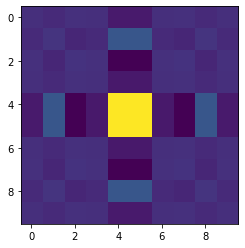

In [6]:
plt.imshow(y)
plt.show()

In [7]:
x1_a=ctrl.Antecedent(x1,'x1')
x2_a=ctrl.Antecedent(x2,'x2')

In [8]:
x1_a['Low'] = fuzz.trimf(x1_a.universe,[-10,-6,2])
x1_a['High'] = fuzz.trimf(x1_a.universe,[-2,6,10])

C:\Users\ua58809\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


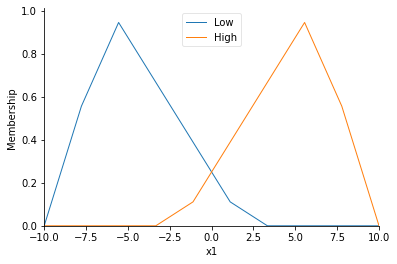

In [9]:
x1_a.view()

In [10]:
x2_a['Low'] = fuzz.trimf(x1_a.universe,[-10,-3,3])
x2_a['High'] = fuzz.trimf(x1_a.universe,[-3,3,10])

C:\Users\ua58809\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


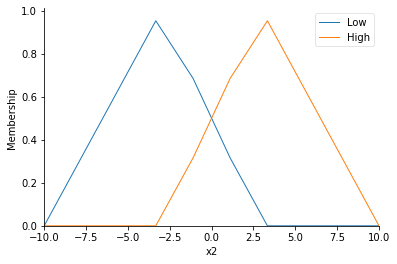

In [11]:
x2_a.view()

In [12]:
#sinc2d = ctrl.Consequent(np.arange(-1,1,0.01),'sinc2d')
#sinc2d = ctrl.Consequent(np.reshape(y,100),'sinc2d')
sinc2d = ctrl.Consequent(np.reshape(y,100),'sinc2d')

In [13]:
sinc2d.automf(3)

C:\Users\ua58809\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


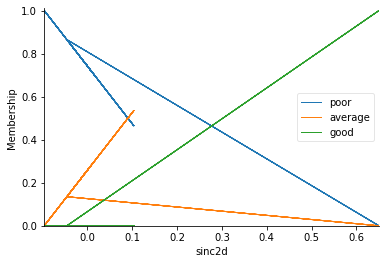

In [14]:
sinc2d.view()

In [15]:
rule1 = ctrl.Rule(x1_a['Low'] & x2_a['Low'], sinc2d['poor'])

In [19]:
rule1

IF x1[Low] AND x2[Low] THEN sinc2d[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax